## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv



Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [292]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import string
import math
%matplotlib inline

In [4]:
# Read txt files folder. 
def Read_Folder(folder_path):
    """
    Function to read a folder of txt files
    
    inputs: consists of the folder root path.
    outputs: two lists, one contains the files names and the sec one contains the content of each txt file
    
    """
    job_bulletins=[]
    files_names=[]
    for root, dirs,files in os.walk(folder_path):
        for file in files:
            files_names.append(file)
            path=os.path.join(root,file)
            with open(path) as f:
                   lines= list(line for line in (l.strip() for l in f) if line )
                   #print(lines)
                   job_bulletins.append(lines)
         
                    
    return job_bulletins, files_names

In [5]:
def Job_class_titles(files_names):
    """
    Function that reads a list of all files names of the job postings and return a list
    of all job class titles
    
    input: a list of the files names of the job postings 
    output: a list of all job class titles
    
    """
    job_class_titles=[]
    for file_name in files_names:
        for j , char in enumerate (file_name):   
            if char.isdigit():
                job_class_titles.append(file_name[:j].title().strip())
                break
    '''for job_bulletin in job_bulletins:
            job_class_titles.append(job_bulletin[0].strip('\n').strip('\t')'''
    job_class_titles[0]="311 Director"
    job_class_titles.insert(files_names.index('Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt'),"Vocational Worker")
    job_class_titles[job_class_titles.index('SR CRIME _ INTELLIGENCE ANALYST'.title())] = "Senior Crime Intelligence Analyst"
        
    return job_class_titles

In [6]:
def Job_class_no(files_names):
    """
    Function that reads a list of all files names of the job postings and return a list
    of all job class numbers
    
    input: a list of the files names of the job postings 
    output: a list of all job class titles
    
    """
    job_class_numbers=[]
    for file_name in files_names:
        for j , char in enumerate (file_name):   
            if char.isdigit():
                job_class_numbers.append(file_name[j:j+4])
                break
    job_class_numbers[0]='9206'
    job_class_numbers.insert(files_names.index('Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt'),np.NaN)
    #job_class_numbers = [ ''.join(job_bulletins[i][1].split())[-4:] for i in range(len(job_bulletins))]  
    return job_class_numbers

In [7]:
def Job_open_date(job_bulletins):
    """
    Function that reads a list of all files names of the job postings and return a list
    of all job open dates
    
    input: a list of the files names of the job postings 
    output: a list of all job class titles
    
    """
    job_open_dates =[]
    job_open_dates = [ j.replace('Open Date:','').strip() for job_bulletin in job_bulletins for j in job_bulletin if 'Open Date' in j ]
    job_open_dates[job_open_dates.index('12-08-17 (Exam Open to All, including Current City Employees)')] = '12-08-17'  
    job_open_dates[job_open_dates.index('Class Code:       1428\t \t\t                                                                                            10-20-17')] = '10-20-17'
    job_open_dates[job_open_dates.index('Class Code:       2235                                         \t\t\t\t\t            03-04-16')] = '03-04-16'
    job_open_dates[job_open_dates.index('12-11-2015')] = '12-11-15'
    job_open_dates[job_open_dates.index('08-28-2015')] = '08-28-15'
    job_open_dates.insert(429,np.NaN)
    job_open_dates.insert(646,np.NaN)
    return job_open_dates

In [8]:
def Job_duties(job_bulletins):

    job_duties= []
    for j, job_bulletin in enumerate(job_bulletins):
        if 'DUTIES' in job_bulletin or 'DUTIES AND RESPONSIBILITIES' in job_bulletin:
            for i , element in enumerate (job_bulletin):
                if 'DUTIES' == element.upper():
                    job_duties.append(job_bulletin[i+1])
                elif 'DUTIES AND RESPONSIBILITIES' == element.upper():
                    job_duties.append(job_bulletin[i+1] + job_bulletin[i+2])      
        else: 
            job_duties.append(np.NaN)

    return job_duties
    

In [9]:
def check_alpha(string):
    if string.isalpha():
          return False  
    return True

In [10]:
def Salary_range(job_bulletins):
    salary=[]
    salary_upper=[]
    salary_lower=[]
    flag = False
    for j, job_bulletin in enumerate(job_bulletins):
        flag=False
        for i in job_bulletin:
            if i.find("$") != -1:
                num=''.join(filter(check_alpha, i[:21])).replace('-',"").replace('(',"").replace(')',"").replace('(-',"").replace('$',"").replace(";","").replace("(-)","").replace(",","").strip()
                try :  
                    salary_lower.append(int(num[:i.index(" ")-1]))
                    flag=True
                except ValueError:
                    salary_lower.append(np.NaN)
                    flag=True
                try :  
                    salary_upper.append(int(num[i.index(" "):-1]))
                    flag=True
                except ValueError:
                    salary_upper.append(np.NaN)
                    flag=True

                if np.isnan(salary_lower[-1] ) and np.isnan(salary_upper[-1] ):
                    salary.append(np.NaN)
                    
                elif np.isnan(salary_lower[-1] ):
                    salary.append(salary_upper[-1])
                    
                elif np.isnan(salary_upper[-1] ):
                    salary.append(salary_lower[-1])
                    
                else:
                    salary.append(str(salary_lower[-1]) +"-"+ str(salary_upper[-1]))
                break

        if flag == False:
            salary.append(np.NaN)
            salary_lower.append(np.NaN)
            salary_upper.append(np.NaN)
    return salary,salary_upper,salary_lower
    

In [433]:
def School_type(job_bulletins):
    school_table=['apprenticeship', 'college', "university",  
              'high school','trade school', 
             'technical school', 'law school','trade or technical school']
    School_type=[]
    flag = False
    for job_bulletin in job_bulletins:
        flag=False
        for element in job_bulletin:
            schools = list(filter(lambda x: (x in element.lower()) , school_table))
            if schools !=[]:
                School_type.append(' or '.join(schools).title().strip())
                schools.clear()
                flag=True
                break
        if flag == False:
                School_type.append(np.NaN)
    return School_type

In [469]:
def Education_major(job_bulletins):
    Education_type=[]
    flag = False
    School_type=[]
    school_table=['apprenticeship', 'college', "university",  
              'high school','trade school', 
             'technical school', 'law school','trade or technical school']
    for job_bulletin in job_bulletins:
        flag=False
        for element in job_bulletin:
            schools = list(filter(lambda x: (x in element.lower()) , school_table))
            if schools !=[]:
                try:
                    if "college" in schools or 'university' in schools:
                        Education_type.append(element[element.index(" college or university with a major in ")+39:].replace('in order to obtain that position. Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree.','').lower().replace(',',' | ').replace(' and/or ',' | ').replace(' other related field','').replace(' a closely related field','').replace(' a ',' ').replace(' and ',' | ').replace(' an ',' ').replace(';','').replace(' or','').strip())
                        schools.clear()
                    elif 'apprenticeship'in schools:
                        Education_type.append(element[element.index(" apprenticeship with ")+ 20:].replace('in order to obtain that position. Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree.','').lower().replace(',',' | ').replace(' and/or ',' | ').replace(' other related field','').replace(' a closely related field','').replace(' a ',' ').replace(' and ',' | ').replace(' an ',' ').replace(';','').replace(' or','').strip())
                        schools.clear()
                    elif 'technical school' in schools:
                        Education_type.append(element[element.index(" technical school ")+ 18 :].replace('in order to obtain that position. Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree.','').lower().replace(',',' | ').replace(' and/or ',' | ').replace(' other related field','').replace(' a closely related field','').replace(' a ',' ').replace(' and ',' | ').replace(' an ',' ').replace(';','').replace(' or','').strip())
                        schools.clear()
                    elif 'trade or technical school' in schools:
                        Education_type.append(element[element.index(" trade or technical school ")+ 28 :].replace('in order to obtain that position. Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree.','').lower().replace(',',' | ').replace(' and/or ',' | ').replace(' other related field','').replace(' a closely related field','').replace(' a ',' ').replace(' and ',' | ').replace(' an ',' ').replace(';','').replace(' or','').strip())
                        schools.clear()
                    elif 'trade school' in schools:
                        Education_type.append(element[element.index(" trade school ")+ 15 :].replace('in order to obtain that position. Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree.','').lower().replace(',',' | ').replace(' and/or ',' | ').replace(' other related field','').replace(' a closely related field','').replace(' a ',' ').replace(' and ',' | ').replace(' an ',' ').replace(';','').replace(' or','').strip())
                        schools.clear()
                    elif 'law school' in schools:
                        Education_type.append(element[element.index(" law school ")+ 13 :].replace('in order to obtain that position. Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree.','').lower().replace(',',' | ').replace(' and/or ',' | ').replace(' other related field','').replace(' a closely related field','').replace(' a ',' ').replace(' and ',' | ').replace(' an ',' ').replace(';','').replace(' or','').strip())
                        schools.clear()
                    else:
                        Education_type.append(np.NaN)
                except:
                     Education_type.append(np.NaN)
                flag=True
                break
        if flag == False:
                Education_type.append(np.NaN)

    for i , x in enumerate(Education_type):
            if isinstance(x, str):
                try:
                    Education_type[i]= x[:x.index("|")] 
                except ValueError:
                    Education_type[i]=Education_type[i].title()
            else:
                continue
            
    return Education_type

In [13]:
def Requ(job_bulletins):
    requierments=[]
    requiermentsPoints=[]
    note_table=["NOTES:","PROCESS NOTES:", "PROCESS NOTES",'NOTES','PROCESS NOTE' ]
    req_table=["REQUIREMENTS/MINIMUM QUALIFCATIONS", "MINIMUM REQUIREMENTS:","REQUIREMENTS/MINIMUM REQUIREMENTS",  
                 "REQUIREMENT/MINIMUM QUALIFICATIONS","REQUIREMENT/MINUMUM QUALIFICATION", "REQUIREMENT/MINIMUM QUALIFICAITON", 
                 'REQUIREMENT/ MINUMUM QUALIFICATION' , 'REQUIREMENT/ MINIMUM QUALIFICATION','REQUIREMENTS/ MINIMUM QUALIFICATIONS',
                 'REQUIREMENTS/MINUMUM QUALIFICATIONS' ,'REQUIREMENT/MIMINUMUM QUALIFICATION','REQUIREMENT/MINIMUM QUALIFICATION',
                    'REQUIREMENTS', 'QUALIFICATIONS','REQUIREMENTS/MINIMUM QUALIFICATIONS',  'REQUIREMENT']
    flag = False
    for j, job_bulletin in enumerate(job_bulletins):
        flag=False
        for i , element in enumerate(job_bulletin):
                    reqs = list(filter(lambda x: (x in element) , req_table))
                    if reqs !=[] :
                        index1=i
                        reqs.clear()
                        continue
                    notes = list(filter(lambda x: (x in element) , note_table))
                    if notes!=[]:
                        if i > index1: 
                            index2=i
                            notes.clear()
                            requierments.append(job_bulletin[index1+1:index2])          
                            flag=True
                            break
                        else: 
                            continue


        if flag == False:
               requierments.append(np.NaN)
    requierments[646]=["These positions are open to all who apply with a valid California Driver's License."]
    requiermentsPoints= ["".join(req)  for req in requierments]
                          
    return requierments, requiermentsPoints

In [194]:
def Experience_years(requierments):
    map_table= { "one year":"1", "two years":"2", "three years":"3", "four years":"4", "five years":"5", "six years":"6", 
    "seven years":"7", "eight years":"8", "nine years":"9", "ten years":"10",
     "three months":"0.25",'four months':"0.3", "five months":"0.4", "six months":"0.5", 
    "seven months":"0.6", "eight months":"0.7", "nine months":"0.75", "ten months":"0.8"}
    experience_table=["full-time",'full time','part time','part-time']
    experience_years= []
    flag=False
    for requierment in requierments:
        flag=False
        for element in requierment:
            exp=list(filter(lambda x: (x in element.lower()) , experience_table))
            if exp !=[]:
                exp.clear()
                if "year" in element.replace("-"," ").lower():
                    years = list(filter(lambda x: (x in element.replace("-",' ').lower()) , map_table))
                    if years !=[] :
                        experience_years.append(map_table[years[0]])
                        years.clear()
                        flag=True
                        break
        if flag == False:
            experience_years.append(np.NaN)
    return experience_years 

In [15]:
def Full_part_time(requierments):
    full_time=''
    part_time=''
    full_part=[]
    flag=False
    for requierment in requierments:
        flag=False
        for element in requierment:
            if 'full-time' in element.lower() or "full time" in element.lower():
                full_time = 'full time'
                if 'part-time' in element.lower() or "part time" in element.lower():
                    part_time='part time'
            elif 'part-time' in element.lower() or "part time" in element.lower():
                  part_time='part time'    
            else:
                full_time=''
                part_time= ''
            full_part.append(full_time +' ' + part_time)
            flag=True
            break   
        if flag == False:
            full_part.append(np.NaN)
            
    for j , i in enumerate(full_part):
        if i == ' ':
            full_part[j]=np.NaN    
    return full_part

In [16]:
def Experience_job_title(requierments):
    experience_job_title=[]
    experience_table=['apprenticeship as a', 'apprenticeship as an', "experience as a",  
                  'experience as an']
    filtr=["An ", 'with',' or ',',',' and ',';' ,' ' ]
    flag = False 
    indicies=[]
    for i, requierment in enumerate(requierments):
        flag=False
        for element in requierment:
            expers = list(filter(lambda x: (x in element.lower()) , experience_table))
            if expers !=[]:
                try:
                    if "apprenticeship as a" in expers:
                         title= element[element.index(expers[0])+19:]
                         temp = list(filter(lambda x: (x in title.lower()) , filtr))
                         experience_job_title.append(title.partition(temp[0])[0].strip())
                         expers.clear()
                         temp.clear()
                    elif 'apprenticeship as an'in expers:
                         title= element[element.index(expers[0])+20:]
                         temp = list(filter(lambda x: (x in title.lower()) , filtr))
                         experience_job_title.append(title.partition(temp[0])[0].partition(temp[1])[0].strip())
                         expers.clear()
                         temp.clear()
                    elif 'experience as a' in expers:
                         title= element[element.index(expers[0])+15:]
                         temp = list(filter(lambda x: (x in title.lower()) , filtr))
                         experience_job_title.append(title.partition(temp[0])[0].strip())
                         expers.clear()
                         temp.clear()
                    elif 'experience as an' in expers: 
                         title= element[element.index(expers[0])+17:]
                         temp = list(filter(lambda x: (x in title.lower()) , filtr))
                         experience_job_title.append(title.partition(temp[0])[0].partition(temp[1])[0].strip())
                         expers.clear()
                         temp.clear()

                except ValueError: 
                    experience_job_title.append(np.NaN)
                    expers.clear()
                flag= True
                break
        if flag == False:
                experience_job_title.append(np.NaN)
    return experience_job_title

In [17]:
def Course_length(requirments):
    map_table= { "one":"1", "two":"2", "three":"3", "four":"4", "five":"5", "six":"6", 
    "seven":"7", "eight":"8", "nine":"9", "ten":"10"}
    course_length= []
    flag = False
    semesters=[]
    quarters=[]
    temp1=''
    temp2=''
    indicies=[]
    for j, req in enumerate(requierments):
        flag = False
        for i in req:
            if 'semester' in i.lower():
                flag = True
                temp1 = ''.join(filter(check_alpha, i[i.index("semester")-4:i.index("semester")-1])).strip() #for int units
                temp2 = ''.join(map_table[key] for key in map_table if key in i[i.index("semester")-6:i.index("semester")-1].strip()) #for str units
                if temp1.isdigit():
                    semesters.append(temp1+ "S")
                    temp1=''
                elif temp2 != '':
                    semesters.append(temp2 + "S")
                    temp2=''
                else:
                    semesters.append('')
            if 'quarter' in i.lower() or 'quarters' in i.lower() :
                    flag = True
                    temp1 = ''.join(filter(check_alpha, i[i.index("quarter")-4:i.index("quarter")-1])).strip() #for int units
                    temp2 = ''.join(map_table[key] for key in map_table if key in i[i.index("quarter")-6:i.index("quarter")-1].strip()) #for str units
                    if temp1.isdigit():
                        quarters.append(temp1 + "Q")
                        temp1=''
                    elif temp2 != '':
                        quarters.append(temp2 + "Q")
                        temp2=''
                    else:
                        quarters.append("")
            if flag == True:
                    break

        if flag == False:
                semesters.append('')
                quarters.append('')

    quarters.append('')   
    course_length= [a + "," + b for a, b in zip(semesters, quarters)]     
    return course_length
                
    

In [126]:
#subjects taken in semesters or quaterters or coursework 
def Course_subject(requierments):
    course_subjects=[]
    flag = False
    for j, req in enumerate(requierments):
        flag = False
        for i in req:
            if " coursework " in i.lower():
                temp1=i.split(" coursework ")[1].split(";")[0].title()
                temp1=temp1.split("Including")[0].replace('With Courses In','').replace('An Accredited College Or University','').replace('An Accredited College Or University','').replace('from','').replace('Or A Related Field.',"").title().strip()
                course_subjects.append(temp1[:50])
                flag = True 
                break
            elif " of classes " in i.lower():
                temp1=i.split(" of classes from ")[1].split(";")[0].title()
                temp1=temp1.split("Including")[0].replace('With Courses In','').replace('An Accredited College Or University','').replace('An Accredited College Or University','').replace('from','').replace('Or A Related Field.',"").title().strip()
                course_subjects.append(temp1[:70])
                flag = True 
                break       
            elif 'semester' in i.lower() :
                temp1 = i
                if " units in " in temp1:
                    temp1=temp1.split(" units in ")[1].split(";")[0].split(" at ")[0].replace("the fields listed", "").replace("an accredited college or university.","").replace("the required coursework.","").replace("any of the following areas: ","").replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace("one or more of the following disciplines:",'').replace("the following courses: ",'').replace('either ','').strip().title()
                elif " courses in " in temp1:
                    temp1=temp1.split(" courses in ")[1].split(";")[0].split(" at ")[0].replace("the fields listed", "").replace("an accredited college or university.","").replace("the required coursework.","").replace("any of the following areas: ","").replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace("one or more of the following disciplines:",'').replace("the following courses: ",'').replace('either ','').strip().title()
                elif " units of " in temp1:
                    temp1=temp1.split(" units of ")[1].split(";")[0].split(" at ")[0].replace("the fields listed", "").replace("an accredited college or university.","").replace("the required coursework.","").replace("any of the following areas: ","").replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace("one or more of the following disciplines:",'').replace("the following courses: ",'').replace('either ','').strip().title()
                elif " units " in temp1:
                    if " in " in temp1:
                        temp1 = temp1.split(" in ")[1]                    
                        if temp1.startswith("requ") or temp1.startswith("which"):
                            continue
                        if temp1.startswith("the"):                    
                            temp1 = temp1.replace("the production", "production")
                            temp1 = temp1.replace("the areas of", "")
                            flag = True
                        if temp1.startswith("the"):
                            continue
                  #More clean up          
                temp1=temp1.split("Including")[0].replace('With Courses In','').replace('An Accredited College Or University','').replace('An Accredited College Or University','').replace('from','').replace('Or A Related Field.',"").strip()
                course_subjects.append(temp1[:70])
                flag = True 
                break

            elif 'quarter' in i.lower() :
                temp1 = i
                if " units in " in temp1:
                    temp1=temp1.split(" units in ")[1].split(";")[0].split(" at ")[0].replace("the fields listed", "").replace("an accredited college or university.","").replace("the required coursework.","").replace("any of the following areas: ","").replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace("one or more of the following disciplines:",'').replace("the following courses: ",'').replace('either ','').strip().title()
                elif " courses in " in temp1:
                    temp1=temp1.split(" courses in ")[1].split(";")[0].split(" at ")[0].replace("the fields listed", "").replace("an accredited college or university.","").replace("the required coursework.","").replace("any of the following areas: ","").replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace("one or more of the following disciplines:",'').replace("the following courses: ",'').replace('either ','').strip().title()
                elif " units of " in temp1:
                    temp1=temp1.split(" units of ")[1].split(";")[0].split(" at ")[0].replace("the fields listed", "").replace("an accredited college or university.","").replace("the required coursework.","").replace("any of the following areas: ","").replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace('from an accredited trade school, college or university may be substituted for a maximum of one year of the above experience lacking.','').replace('Applicants may substitute a maximum of two years of such education for the required experience.','').replace('each of the following areas:','').replace("one or more of the following disciplines:",'').replace("the following courses: ",'').replace('either ','').strip().title()
                elif " units " in temp1:
                    if " in " in temp1:
                        temp1 = temp1.split(" in ")[1]                  
                        if temp1.startswith("requ") or temp1.startswith("which"):
                            continue
                        if temp1.startswith("the"):                    
                            temp1 = temp1.replace("the production", "production")
                            temp1 = temp1.replace("the areas of", "")
                            flag=True
                        if temp1.startswith("the"):
                            continue   
                temp1=temp1.split("Including")[0].replace('With Courses In','').replace('An Accredited College Or University','').replace('An Accredited College Or University','').replace('from','').replace('Or A Related Field.',"").strip()
                course_subjects.append(temp1[:70])
                flag = True 
                break

        if flag == False:
            course_subjects.append(np.NaN)
    return course_subjects

In [105]:
def Exam_type(job_bulletins):
    exam_type=[]
    for j ,job_bulletin in enumerate(job_bulletins):
        flag=False
        for i, exam in enumerate(job_bulletin):
            if "BASIS" in exam:
                line = exam.lower() 
                if "open" in line and 'interdepar' in line:
                    exam_type.append("Open and Interdep Prom")
                    flag=True
                elif " interdepar" in line: 
                    exam_type.append("Interdept Prom")
                    flag=True
                elif " depar" in line:
                    exam_type.append("Dep Prom")
                    flag=True
                else:
                    exam_type.append("Open")
                    flag=True                   
                break    
        
        if flag == False:
            exam_type.append("Open")
 
    return exam_type
    

In [102]:
def Driver_license(job_bulletins):
    driver_license=[]
    indicies=[]
    for j ,job_bulletin in enumerate(job_bulletins):
        flag=False
        for exam in job_bulletin:
            if "valid" in exam and " license" in exam:
                line = exam.lower() 
                license = "YES"
                if 'may' in line or 'might' in line:
                    license="MAYBE"
                driver_license.append(license)
                flag=True                   
                break    
        if flag == False:
            license="NO"
            driver_license.append(license)
 
    return driver_license

In [147]:
def Education_years(requierments):
    map_table= { "one":"1", "two":"2", "three":"3", "four":"4", "five":"5", "six":"6", 
                "seven":"7", "eight":"8", "nine":"9", "ten":"10"}
    
    school_table=[ 'college', "university",  
                  'trade school', 'technical school',
                  'law school','trade or technical school']
    
    Education_years= []
    temp=[]
    temp2=''
    flag = False
    for i, req in enumerate(requierments):
        flag = False
        for element in req :
            temp = list(filter(lambda x: (x in element.lower()) , school_table))
            if temp !=[]:
                if "year" in element.lower():
                    temp2 = ''.join(map_table[key] for key in map_table if key in element[element.replace("-",' ').index("year")-6:element.replace("-",' ').index("year")-1].strip()) 
                    if temp2 !='':
                        Education_years.append(temp2)
                    else: 
                        Education_years.append(np.NaN)
                    temp.clear() 
                    temp2=''
                else:
                    Education_years.append(np.NaN)
                flag = True 
                break

        if flag == False:
            Education_years.append(np.NaN)
                
                        
    return Education_years
    

In [179]:
def Course_count(requirments):
    map_table= { "one":"1", "two":"2", "three":"3", "four":"4", "five":"5", "six":"6", 
    "seven":"7", "eight":"8", "nine":"9", "ten":"10"}
    course_count = []
    flag = False
    temp1=''
    temp2=''
    for j, req in enumerate(requierments):
        flag = False
        for x, i in enumerate(req):
            if 'course' in i.lower():
                #print(i,"---->", j)
                temp1 = ''.join(filter(check_alpha, i[i.lower().index("course")-4:i.lower().index("course")-1])).strip() #for int units
                temp2 = ''.join(map_table[key] for key in map_table if key in i[i.lower().index("course")-6:i.lower().index("course")-1].strip()) #for str units
                if temp1.isdigit():
                    course_count.append(temp1)
                    temp1=''
                    flag = True
                elif temp2 != '':
                    course_count.append(temp2)
                    temp2=''
                    flag = True
                else:
                    course_count.append(np.NaN)
                    flag = True
            """elif 'class' in i.lower():
                    flag = True
                    temp1 = ''.join(filter(check_alpha, i[i.lower().index("class")-4:i.lower().index("class")-1])).strip() #for int units
                    temp2 = ''.join(map_table[key] for key in map_table if key in i[i.lower().index("class")-6:i.lower().index("class")-1].strip()) #for str units
                    if temp1.isdigit():
                        course_count.append(temp1)
                        temp1=''
                        flag = True
                    elif temp2 != '':
                        course_count.append(temp2 )
                        temp2=''
                        flag = True
                    else:
                        course_count.append("")
                        flag = True"""

            if flag == True:
                    break

        if flag == False:
                course_count.append(np.NaN)
    return course_count


In [20]:
job_bulletins, files_names= Read_Folder(r"C:\Users\User\Desktop\Data Science_Machine Learning Training\DS 2\cityofla\CityofLA\Job Bulletins")

In [470]:
job_class_titles=Job_class_titles(files_names)
job_class_numbers=Job_class_no(files_names)
job_duties=Job_duties(job_bulletins)
requierments,requiermentsPoints = Requ(job_bulletins)
education_years=Education_years(requierments)
school_type=School_type(job_bulletins)
education_major=Education_major(job_bulletins)
experience_length=Experience_years(requierments)
full_part_time=Full_part_time(requierments)
experience_job_title=Experience_job_title(requierments)
course_count=Course_count(requierments)
course_length=Course_length(requierments)
course_subjects=Course_subject(requierments)
drivers_license=Driver_license(job_bulletins)
exam_type=Exam_type(job_bulletins)
salary_range,salary_lower,salary_upper=Salary_range(job_bulletins)
open_dates=Job_open_date(job_bulletins)

In [471]:
data={"FILE_NAME": files_names,
      "JOB_CLASS_TITLE": job_class_titles,
      'JOB_CLASS_NO': job_class_numbers,
      "JOB_DUTIES": job_duties,
      "EDUCATION_YEARS":education_years,
      "SCHOOL_TYPE":school_type,
      "EDUCATION_MAJOR": education_major,
      "EXPERIENCE_LENGTH":experience_length,
      "FULL_TIME_PART_TIME":full_part_time,
      "EXP_JOB_CLASS":experience_job_title,
      "COURSE_COUNT": course_count,
      "COURSE_LENGHT":course_length,
      "COURSE_SUBJECT":course_subjects,
      "DRIVERS_LICENSE_REQ":drivers_license,
      "EXAM_TYPE": exam_type,
      "ENTRY_SALARY":salary_range,
      "SALARY_LOWER_LIMIT":salary_lower,
      "SALARY_UPPER_LIMIT":salary_upper,
      "OPEN_DATES":open_dates,
      "REQUIRMENT_SET_TEXT":requiermentsPoints
        }

In [544]:
df=pd.DataFrame()
df=df.from_dict(data)

In [ ]:
df.to_csv(r"C:\Users\User\Desktop\csvfile.csv")

In [546]:
df

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS,COURSE_COUNT,COURSE_LENGHT,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY,SALARY_LOWER_LIMIT,SALARY_UPPER_LIMIT,OPEN_DATES,REQUIRMENT_SET_TEXT
0,311 DIRECTOR 9206 041814.txt,311 Director,9206,A 311 Director is responsible for the successf...,4,College Or University,NaN,1,full time,Senior Management Analyst,NaN,",",NaN,NO,Open and Interdep Prom,125175-15551,15551.0,125175.0,04-18-14,1. One year of full-time paid experience as a ...
1,ACCOUNTANT 1513 062218.txt,Accountant,1513,An Accountant does professional accounting wor...,4,College Or University,NaN,NaN,NaN,NaN,NaN,"24S,36Q",Accounting.,MAYBE,Open,49903-7299,7299.0,49903.0,06-22-18,Graduation from an accredited four-year colleg...
2,ACCOUNTING CLERK 1223 071318.txt,Accounting Clerk,1223,An Accounting Clerk performs difficult and res...,NaN,College Or University Or Trade School,NaN,1,full time,NaN,NaN,"6S,9Q",Bookkeeping Or Accounting From An Accredited T...,NO,Open and Interdep Prom,49005-7161,7161.0,49005.0,07-13-18,Two years of full-time paid office clerical ex...
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,Accounting Records Supervisor,1119,"An Accounting Records Supervisor assigns, revi...",NaN,NaN,NaN,2,full time,"n Accounting Clerk,",NaN,",",NaN,NO,Interdept Prom,55332-8093,8093.0,55332.0,07-27-18,Two years of full-time paid experience as an A...
4,ADMINISTRATIVE ANALYST 1590 060118.txt,Administrative Analyst,1590,An Administrative Analyst performs professiona...,4,College Or University,NaN,1,full time,Management Assistant,NaN,",",NaN,MAYBE,Open,60489-8846,8846.0,60489.0,06-01-18,1. One year of full-time paid professional exp...
5,ADMINISTRATIVE CLERK 1358 033018 (2).txt,Administrative Clerk,1358,An Administrative Clerk performs general offic...,NaN,High School,NaN,NaN,full time,NaN,NaN,",",NaN,MAYBE,Open,37584-5493,5493.0,37584.0,03-30-18,Six months of full-time paid experience in cle...
6,ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt,Administrative Hearing Examiner,9135,An Administrative Hearing Examiner conducts qu...,NaN,NaN,NaN,2,full time,NaN,NaN,",",NaN,MAYBE,Open and Interdep Prom,54726-8001,8001.0,54726.0,10-09-15,1. Two years of full-time paid experience with...
7,ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...,Advance Practice Provider Correctional Care,2325,An Advance Practice Provider Correctional Care...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN,NO,Open,78487-9753,9753.0,78487.0,02-08-08,1. Must be licensed as a:a. Registered Nurse a...
8,AIR CONDITIONING MECHANIC 3774 041417.txt,Air Conditioning Mechanic,3774,"An Air Conditioning Mechanic installs, modifie...",NaN,Apprenticeship,NaN,6,NaN,refrigeration,NaN,"12S,18Q","Air Conditioning Technology, Refrigeration And...",YES,Open and Interdep Prom,90118,NaN,90118.0,04-14-17,1. Completion of a recognized apprenticeship a...
9,AIR CONDITIONING MECHANIC SUPERVISOR 3781 1116...,Air Conditioning Mechanic Supervisor,3781,An Air Conditioning Mechanic Supervisor assign...,NaN,NaN,NaN,2,full time,n air conditioning mechanic or in a craft at t...,NaN,",",NaN,YES,Interdept Prom,103841-10848,10848.0,103841.0,11-16-18,Four years of full-time paid experience as an ...


### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?
   
    
<font color='red' size=4 >A Police Commander is the best job, since it's a job that doesn't require experience with the highest salary.</font>   

In [ ]:
no_exp_job=df[df["EXPERIENCE_LENGTH"].isna()]
job_titles=no_exp_job["JOB_CLASS_TITLE"]
avg_salary=no_exp_job[["SALARY_UPPER_LIMIT","SALARY_LOWER_LIMIT"]].mean(axis=1)

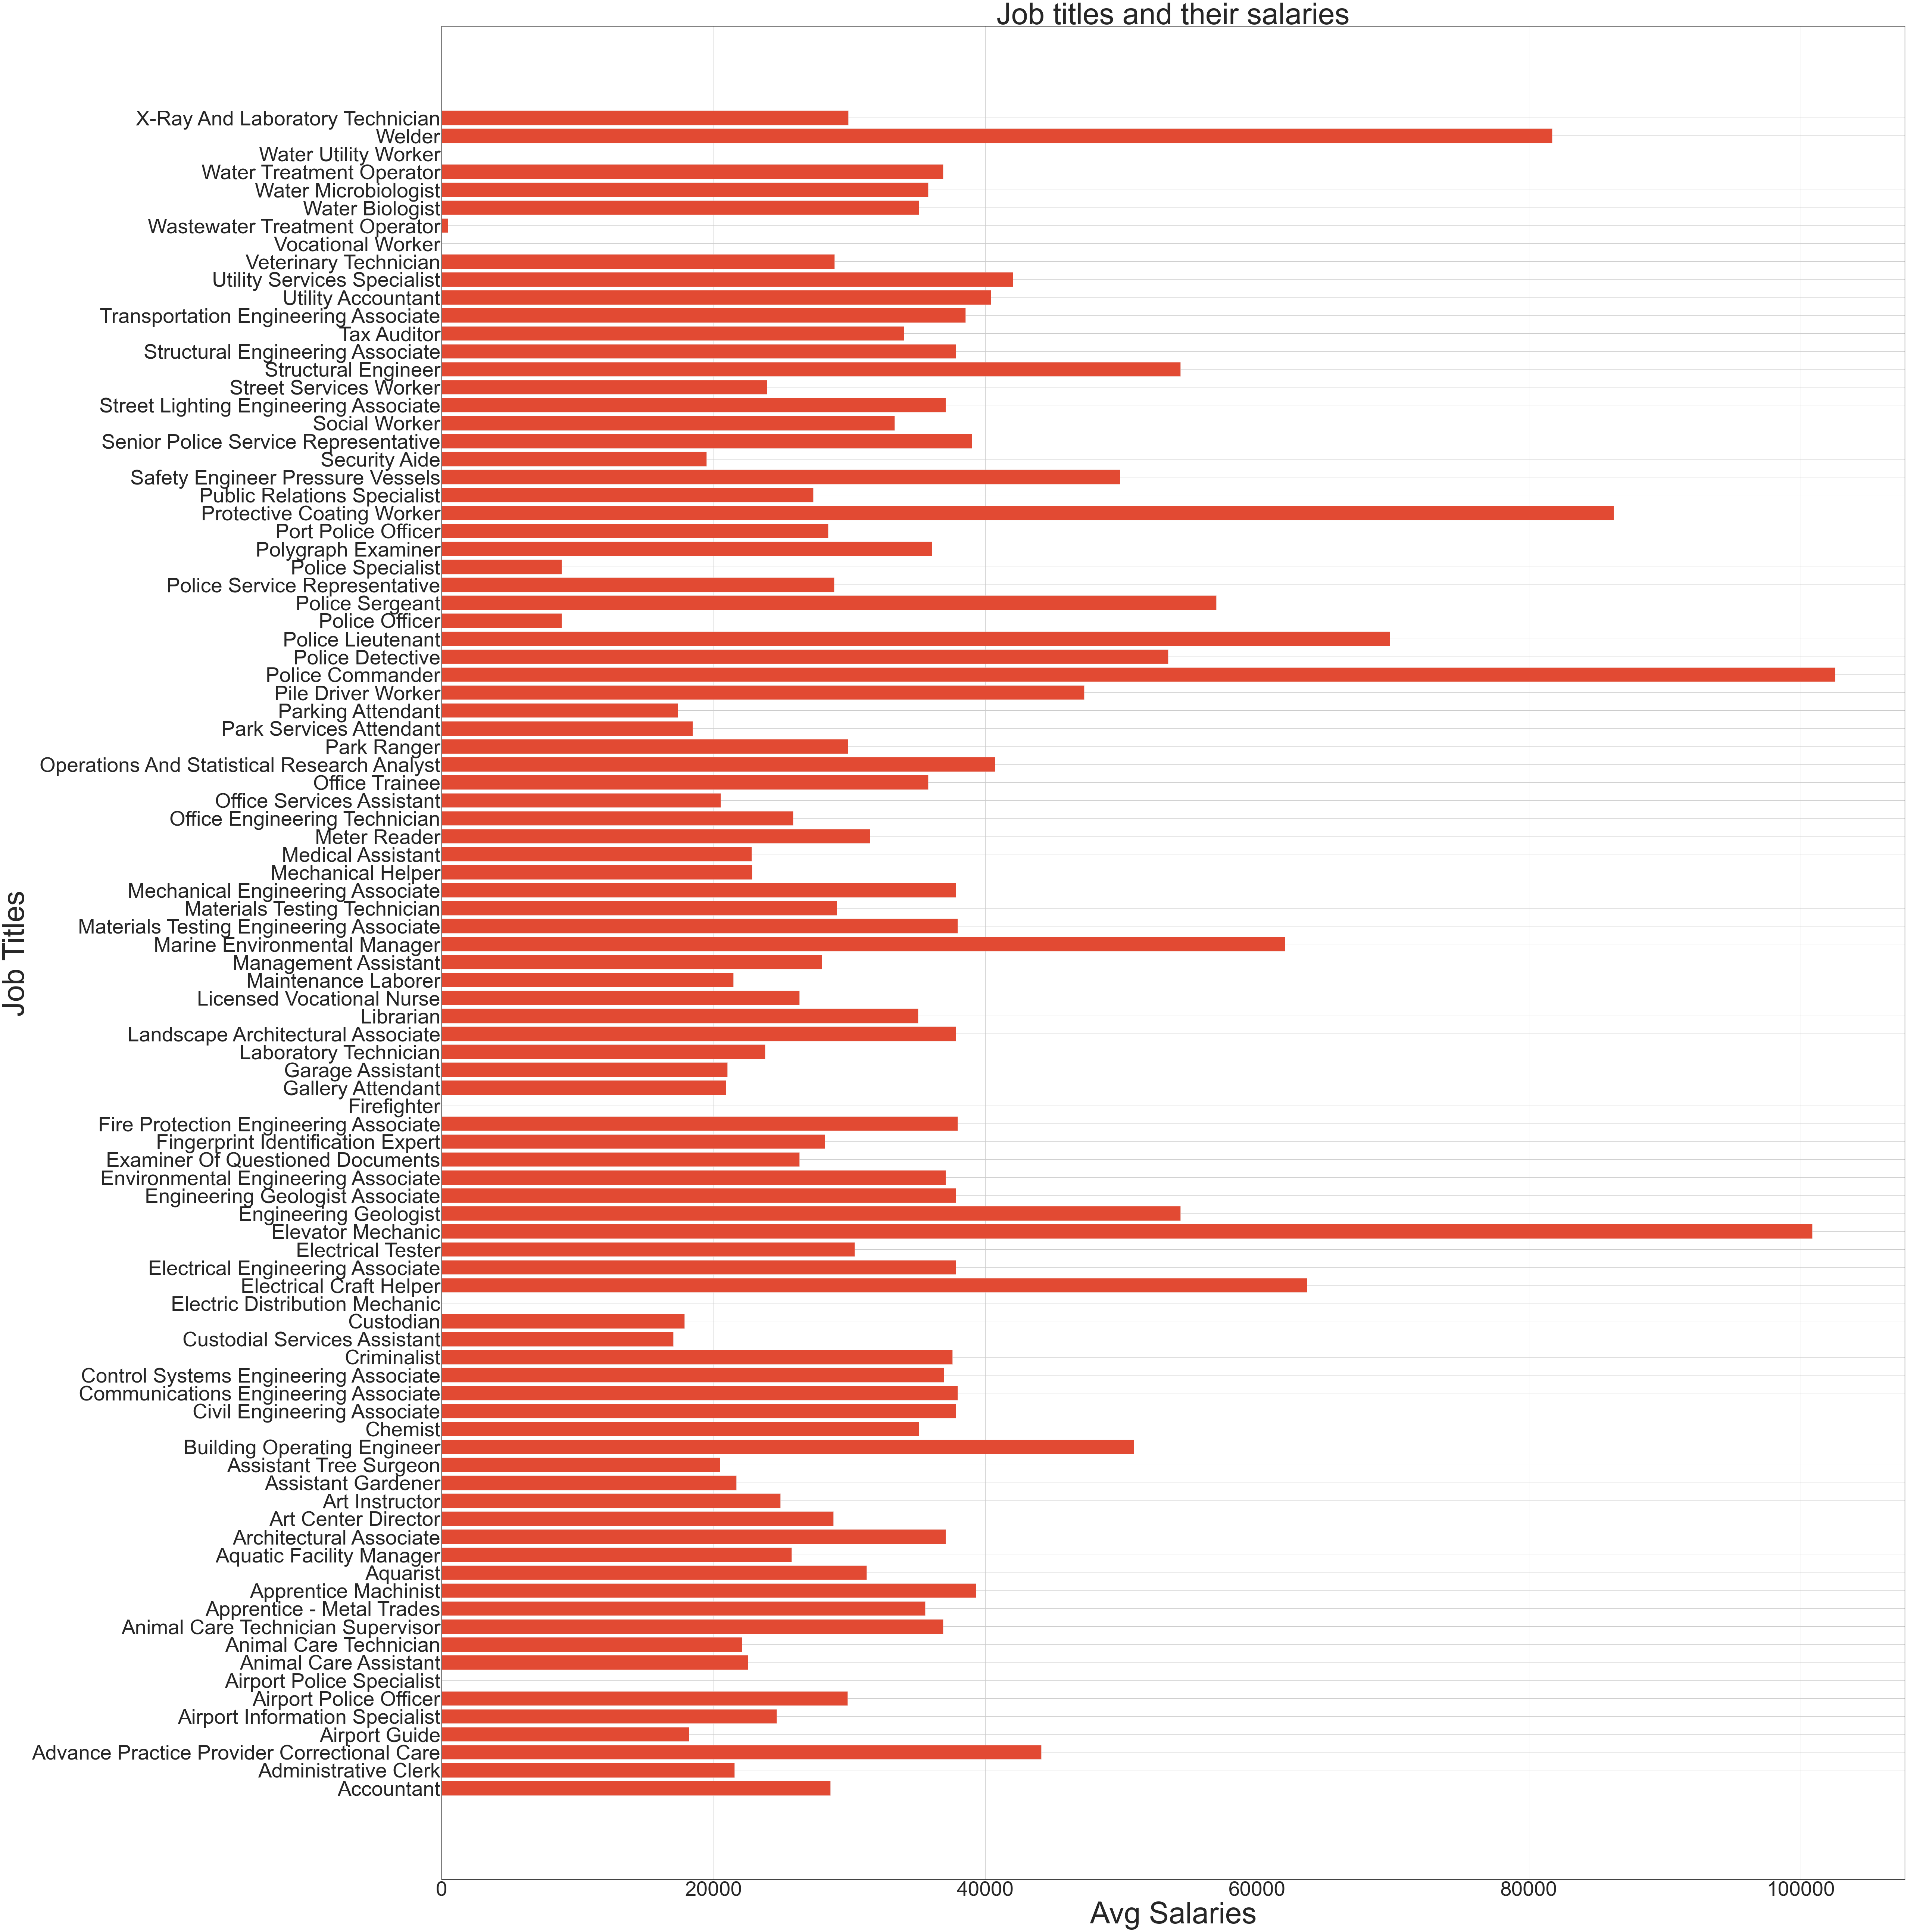

In [664]:
fig = plt.figure(figsize=(70,70))
ax = fig.add_subplot(111)
yvals = range(len(job_titles))
ax.barh(yvals, avg_salary, align='center', alpha=1)
plt.yticks(yvals,job_titles)
plt.tight_layout()
plt.xlabel('Avg Salaries',fontsize=80)
plt.ylabel("Job Titles", fontsize=80)
plt.title('Job titles and their salaries',fontsize=80)
plt.grid()
plt.show()

### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?
   
<font color='red' size=4 >Going for a college is the best option since most jobs are asking for a degree from a college, also going for a university is a good option.</font>   

In [557]:
### Write you code here ###
schools_type=df[~df["SCHOOL_TYPE"].isna()]
schools_type=schools_type.loc[:,"SCHOOL_TYPE"]
df2= schools_type.str.split(" Or ")
df3=df2.explode() #Some jobs requires more than one school type so I had to seperate them.
df3=df3.replace("Trade","Trade School") #Change Trade to trade school

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'College'),
  Text(1, 0, 'University'),
  Text(2, 0, 'Apprenticeship'),
  Text(3, 0, 'Trade School'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'Technical School'),
  Text(6, 0, 'Law School')])

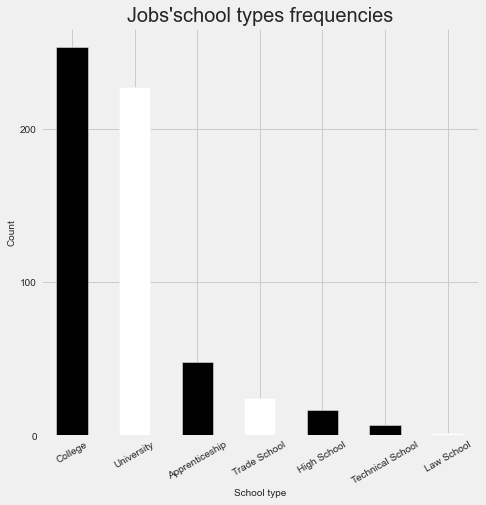

In [558]:
#plt.style.use('fivethirtyeight') 
df3.value_counts().plot(kind="bar", figsize=(7,7),fontsize=10, color=['black', 'white', 'black', 'white', 'black'])
plt.xlabel("School type",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Jobs'school types frequencies",fontsize=20)
plt.xticks(rotation=30, horizontalalignment="center")

### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?
    
<font color='red' size=4 >As you can see, In October, Job postings are open for applications</font> 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Oct'),
  Text(1, 0, 'Mar'),
  Text(2, 0, 'Dec'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'Sep'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Nov'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'May'),
  Text(9, 0, 'Jan'),
  Text(10, 0, 'Feb'),
  Text(11, 0, 'Aug')])

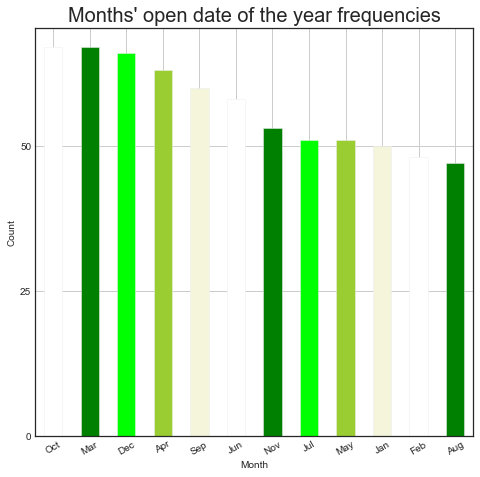

In [657]:
### Write you code here ###
import calendar
df4=pd.DataFrame()
df4["Open_Dates"]= pd.to_datetime(df[~df["OPEN_DATES"].isna()]["OPEN_DATES"])
months=(df4['Open_Dates'].dt.month).astype(int).apply(lambda x: calendar.month_abbr[x])
months.value_counts().plot(kind="bar", figsize=(7,7),fontsize=10, color=['white', 'green', 'lime', 'yellowgreen', 'beige'])
plt.xlabel("Month",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Months' open date of the year frequencies",fontsize=20)
plt.grid()
plt.xticks(rotation=30, horizontalalignment="center")